- 1. none of my columns had normal distribution 
- 2. I removed all missing values since there were very few and the rwos with missing values had missing values within all the other columns
- 3. Most of my data was categorical and I chose to use level encoding for the attributes that had specefic values that were hiarchal and onhot encoding for my other values to run smoothly with my nural network 
- 4. I used a box plot which uppon further review was a mistake as it messed with the distribution of some KPI's 
- 5. I normalized the data by scaling the values between 0-1 because I used onehot encoding 
- 6. Each model performed very poorly however my random forest performed the best 
- 7. It was hard to determan if there was bias or variance with such low aaccuracy scores 



For times sake this analysis could be improoved by changing my data encoding, and by changing which outliers to remove. However, even if these changes are made I would still expect a low score in my models because predicting price requires more KPI's which were not included in this dataset.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
rawDF = pd.read_csv("laptopData.csv")

rawDF.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
rawDF.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


In [4]:
for col in rawDF:
    naCount = rawDF[col].isna().sum()
    print(f"The number of na values in the {col} col is {naCount}")

The number of na values in the Unnamed: 0 col is 30
The number of na values in the Company col is 30
The number of na values in the TypeName col is 30
The number of na values in the Inches col is 30
The number of na values in the ScreenResolution col is 30
The number of na values in the Cpu col is 30
The number of na values in the Ram col is 30
The number of na values in the Memory col is 30
The number of na values in the Gpu col is 30
The number of na values in the OpSys col is 30
The number of na values in the Weight col is 30
The number of na values in the Price col is 30


In [5]:
CleanDF = rawDF.dropna()
CleanDF.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
CleandDF = CleanDF.drop(CleanDF.columns[0], axis=1)
CleandDF.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
# Print unique values and their counts
value_counts = CleandDF['Memory'].value_counts()

for value, count in value_counts.items():
    print(f"{value}: {count} times")

256GB SSD: 401 times
1TB HDD: 217 times
500GB HDD: 130 times
512GB SSD: 116 times
128GB SSD +  1TB HDD: 92 times
128GB SSD: 74 times
256GB SSD +  1TB HDD: 71 times
32GB Flash Storage: 37 times
2TB HDD: 16 times
64GB Flash Storage: 14 times
512GB SSD +  1TB HDD: 14 times
1TB SSD: 13 times
256GB SSD +  2TB HDD: 10 times
1.0TB Hybrid: 9 times
256GB Flash Storage: 8 times
16GB Flash Storage: 7 times
32GB SSD: 6 times
180GB SSD: 4 times
128GB Flash Storage: 4 times
512GB SSD +  2TB HDD: 3 times
16GB SSD: 3 times
512GB Flash Storage: 2 times
1TB SSD +  1TB HDD: 2 times
128GB SSD +  2TB HDD: 2 times
256GB SSD +  500GB HDD: 2 times
256GB SSD +  256GB SSD: 2 times
512GB SSD +  256GB SSD: 1 times
512GB SSD +  512GB SSD: 1 times
64GB Flash Storage +  1TB HDD: 1 times
1TB HDD +  1TB HDD: 1 times
32GB HDD: 1 times
64GB SSD: 1 times
?: 1 times
128GB HDD: 1 times
240GB SSD: 1 times
8GB SSD: 1 times
508GB Hybrid: 1 times
1.0TB HDD: 1 times
512GB SSD +  1.0TB Hybrid: 1 times
256GB SSD +  1.0TB Hybrid: 

In [8]:
CleandDF["Ram"] = CleandDF ["Ram"].str.replace("GB","")
CleandDF["Weight"] = CleandDF ["Weight"].str.replace("kg","")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("GB SSD","")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("GB Flash Storage","")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("GB HDD","")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("TB HDD","000")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("128 +  1000","1128")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("256 +  1000","1256")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("512 +  1000","1512")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("1TB SSD","1000")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("256 +  2000", "2256")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("1.0TB Hybrid","1000")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("512 +  2000","2512")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("1TB SSD +  1000","2000")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("128 +  2000","2128")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("256 +  500","756")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("256 +  256","512")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("512 +  256","768")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("512 +  512","1024")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("64 +  1000","1064")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("1000 +  1000","2000")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("?","256")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("508GB Hybrid","508")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("512 +  1.0TB Hybrid","1512")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("256 +  1.0TB Hybrid","1256")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("256 +  1000 ","1256")
CleandDF["Memory"] = CleandDF ["Memory"].str.replace("512 +  1000 ","1512")



CleandDF.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128,Intel HD Graphics 520,Windows 10,1.8,33992.64
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512,Intel HD Graphics 520,Windows 10,1.3,79866.72
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64,Intel HD Graphics,Windows 10,1.5,12201.12
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1000,AMD Radeon R5 M330,Windows 10,2.19,40705.92
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500,Intel HD Graphics,Windows 10,2.2,19660.32


In [9]:
# Print unique values and their counts
value_counts = CleandDF['Memory'].value_counts()

for value, count in value_counts.items():
    print(f"{value}: {count} times")

256: 410 times
1000: 239 times
500: 130 times
512: 120 times
1128: 92 times
128: 79 times
1256: 71 times
32: 44 times
2000: 19 times
64: 15 times
1512: 14 times
16: 10 times
2256: 10 times
180: 4 times
2512: 3 times
2128: 2 times
756: 2 times
768: 1 times
1024: 1 times
1064: 1 times
240: 1 times
8: 1 times
508: 1 times
1.0000: 1 times
512 +  1000: 1 times
256 +  1000: 1 times


In [10]:
# Print unique values and their counts
value_counts = CleandDF['Inches'].value_counts()

for value, count in value_counts.items():
    print(f"{value}: {count} times")

15.6: 640 times
14: 192 times
17.3: 162 times
13.3: 161 times
12.5: 38 times
11.6: 31 times
12: 6 times
13.9: 6 times
13.5: 5 times
12.3: 5 times
15.4: 4 times
15: 4 times
35.6: 3 times
10.1: 3 times
24: 2 times
13: 2 times
18.4: 1 times
27.3: 1 times
33.5: 1 times
?: 1 times
31.6: 1 times
17: 1 times
14.1: 1 times
11.3: 1 times
25.6: 1 times


In [11]:
CleandDF["Inches"] = CleandDF ["Inches"].str.replace("?","15.6")


In [12]:
# Print unique values and their counts
value_counts = CleandDF['Weight'].value_counts()

for value, count in value_counts.items():
    print(f"{value}: {count} times")

2.2: 111 times
2.1: 57 times
2.4: 43 times
2.3: 41 times
2.5: 37 times
2: 32 times
2.8: 27 times
1.2: 25 times
1.86: 23 times
1.4: 23 times
2.04: 22 times
2.18: 22 times
1.5: 21 times
1.6: 20 times
1.9: 19 times
1.95: 18 times
1.8: 17 times
1.3: 17 times
1.7: 17 times
1.91: 14 times
3: 14 times
1.1: 14 times
1.26: 13 times
1.36: 13 times
1.37: 13 times
2.7: 12 times
2.62: 12 times
1.25: 12 times
2.6: 12 times
1.29: 11 times
4.42: 11 times
1.63: 11 times
2.0: 10 times
1.84: 10 times
1.48: 10 times
1.49: 10 times
2.23: 9 times
1.44: 9 times
1.64: 9 times
2.65: 9 times
2.06: 8 times
2.36: 8 times
2.9: 8 times
1.54: 8 times
2.31: 8 times
1.65: 7 times
1.45: 7 times
3.2: 7 times
1.05: 7 times
1.32: 7 times
1.23: 7 times
2.02: 7 times
1.75: 6 times
1.42: 6 times
1.62: 6 times
2.25: 6 times
1.34: 6 times
1.28: 6 times
1.88: 6 times
1.43: 6 times
2.19: 6 times
2.24: 5 times
1.17: 5 times
2.32: 5 times
1.47: 5 times
1.16: 5 times
1.13: 5 times
3.78: 5 times
1.93: 5 times
1.21: 5 times
1.35: 5 t

In [13]:
CleandDF["Weight"] = CleandDF ["Weight"].str.replace("?","")

In [14]:
CleandDF.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [15]:
# Print unique values and their counts
value_counts = CleandDF['OpSys'].value_counts()

for value, count in value_counts.items():
    print(f"{value}: {count} times")

Windows 10: 1047 times
No OS: 63 times
Linux: 61 times
Windows 7: 45 times
Chrome OS: 27 times
macOS: 13 times
Mac OS X: 8 times
Windows 10 S: 8 times
Android: 1 times


In [16]:
from sklearn.preprocessing import LabelEncoder 
LabelData  = CleandDF 

lab = LabelEncoder()

CleandDF['Cpu'] = lab.fit_transform(CleandDF['Cpu'])
CleandDF['Gpu'] = lab.fit_transform(CleandDF['Gpu'])
CleandDF['ScreenResolution'] = lab.fit_transform(CleandDF['ScreenResolution'])

CleandDF.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,23,65,8,128,58,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1,63,8,128,51,macOS,1.34,47895.5232
2,HP,Notebook,15.6,8,74,8,256,53,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,25,85,16,512,9,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,23,67,8,256,59,macOS,1.37,96095.8080


In [17]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
#sparse = False puts it in format where it can be dataframe later
ncoder = OneHotEncoder(sparse_output=False)

#perform one-hot encoding on columns
encodedData = ncoder.fit_transform(CleandDF[['Company']])




In [18]:
# Reset the index of CleandDF
CleandDF.reset_index(drop=True, inplace=True)

# Assuming 'Company' is the column you want to encode
encodedData = ncoder.fit_transform(CleandDF[['Company']])

# Create a DataFrame with the one-hot encoded values
oneHotDF = pd.DataFrame(encodedData, columns=ncoder.get_feature_names_out(['Company']))

# Reset the index of oneHotDF
oneHotDF.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames with the reset index
encodedDF = pd.concat([CleandDF, oneHotDF], axis=1)

encodedDF.to_csv('c:/Users/Kcale/OneDrive/Documents/Data 350/MP3/onehot1.csv', index=False)


In [19]:

# Reset the index of CleandDF
CleandDF.reset_index(drop=True, inplace=True)

# Assuming 'Company' is the column you want to encode
encodedData = ncoder.fit_transform(encodedDF[['OpSys']])

# Create a DataFrame with the one-hot encoded values
oneHotDF = pd.DataFrame(encodedData, columns=ncoder.get_feature_names_out(['OpSys']))

# Reset the index of oneHotDF
oneHotDF.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames with the reset index
encodedDF = pd.concat([encodedDF, oneHotDF], axis=1)

encodedDF.to_csv('c:/Users/Kcale/OneDrive/Documents/Data 350/MP3/onehot2.csv', index=False)


In [20]:
# Reset the index of CleandDF
CleandDF.reset_index(drop=True, inplace=True)

# Assuming 'Company' is the column you want to encode
encodedData = ncoder.fit_transform(encodedDF[['TypeName']])

# Create a DataFrame with the one-hot encoded values
oneHotDF = pd.DataFrame(encodedData, columns=ncoder.get_feature_names_out(['TypeName']))

# Reset the index of oneHotDF
oneHotDF.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames with the reset index
encodedDF = pd.concat([encodedDF, oneHotDF], axis=1)

encodedDF.to_csv('c:/Users/Kcale/OneDrive/Documents/Data 350/MP3/onehot3.csv', index=False)

In [21]:
ncode_DF= pd.read_csv("onehot3.csv")
# List of columns to remove
columns_to_remove = ['Company', 'TypeName', 'OpSys']

# Use the drop method to remove the specified columns
Final_ncode_DF = ncode_DF.drop(columns=columns_to_remove)

Final_ncode_DF.head()

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,Company_Acer,Company_Apple,...,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,13.3,23,65,8,128,58,1.37,71378.6832,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,13.3,1,63,8,128,51,1.34,47895.5232,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,15.6,8,74,8,256,53,1.86,30636.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,15.4,25,85,16,512,9,1.83,135195.3360,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,13.3,23,67,8,256,59,1.37,96095.8080,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
Final_ncode_DF['Memory'] = Final_ncode_DF['Memory'].str.replace("512 +  100","1512")
Final_ncode_DF['Memory'] = Final_ncode_DF['Memory'].str.replace("256 +  100","1256")

In [23]:

Final_ncode_DF.apply(pd.to_numeric, errors='coerce')

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,Company_Acer,Company_Apple,...,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,13.3,23,65,8,128.0,58,1.37,71378.6832,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,13.3,1,63,8,128.0,51,1.34,47895.5232,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,15.6,8,74,8,256.0,53,1.86,30636.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,15.4,25,85,16,512.0,9,1.83,135195.3360,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,13.3,23,67,8,256.0,59,1.37,96095.8080,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,14.0,13,89,4,128.0,47,1.80,33992.6400,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1269,13.3,19,89,16,512.0,47,1.30,79866.7200,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1270,14.0,0,34,2,64.0,40,1.50,12201.1200,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1271,15.6,0,89,6,1000.0,21,2.19,40705.9200,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
Final_ncode_DF.to_csv('c:/Users/Kcale/OneDrive/Documents/Data 350/MP3/final.csv', index=False)

In [25]:

# Create a correlation matrix using the corr method
correlation_matrix = Final_ncode_DF.corr()

# Print or display the correlation matrix
print(correlation_matrix)


                               Inches  ScreenResolution       Cpu       Ram  \
Inches                       1.000000         -0.135150  0.081051  0.142117   
ScreenResolution            -0.135150          1.000000  0.233244  0.233524   
Cpu                          0.081051          0.233244  1.000000  0.438835   
Ram                          0.142117          0.233524  0.438835  1.000000   
Memory                       0.283783         -0.016544  0.170112  0.290239   
Gpu                          0.145702          0.164160  0.494178  0.336039   
Weight                       0.494865         -0.127326  0.162896  0.283302   
Price                        0.044966          0.328953  0.527664  0.685648   
Company_Acer                -0.010343         -0.096264 -0.149948 -0.139135   
Company_Apple               -0.124910          0.141762 -0.068688  0.020272   
Company_Asus                 0.090079         -0.053044  0.006294  0.076585   
Company_Chuwi               -0.015708          0.025

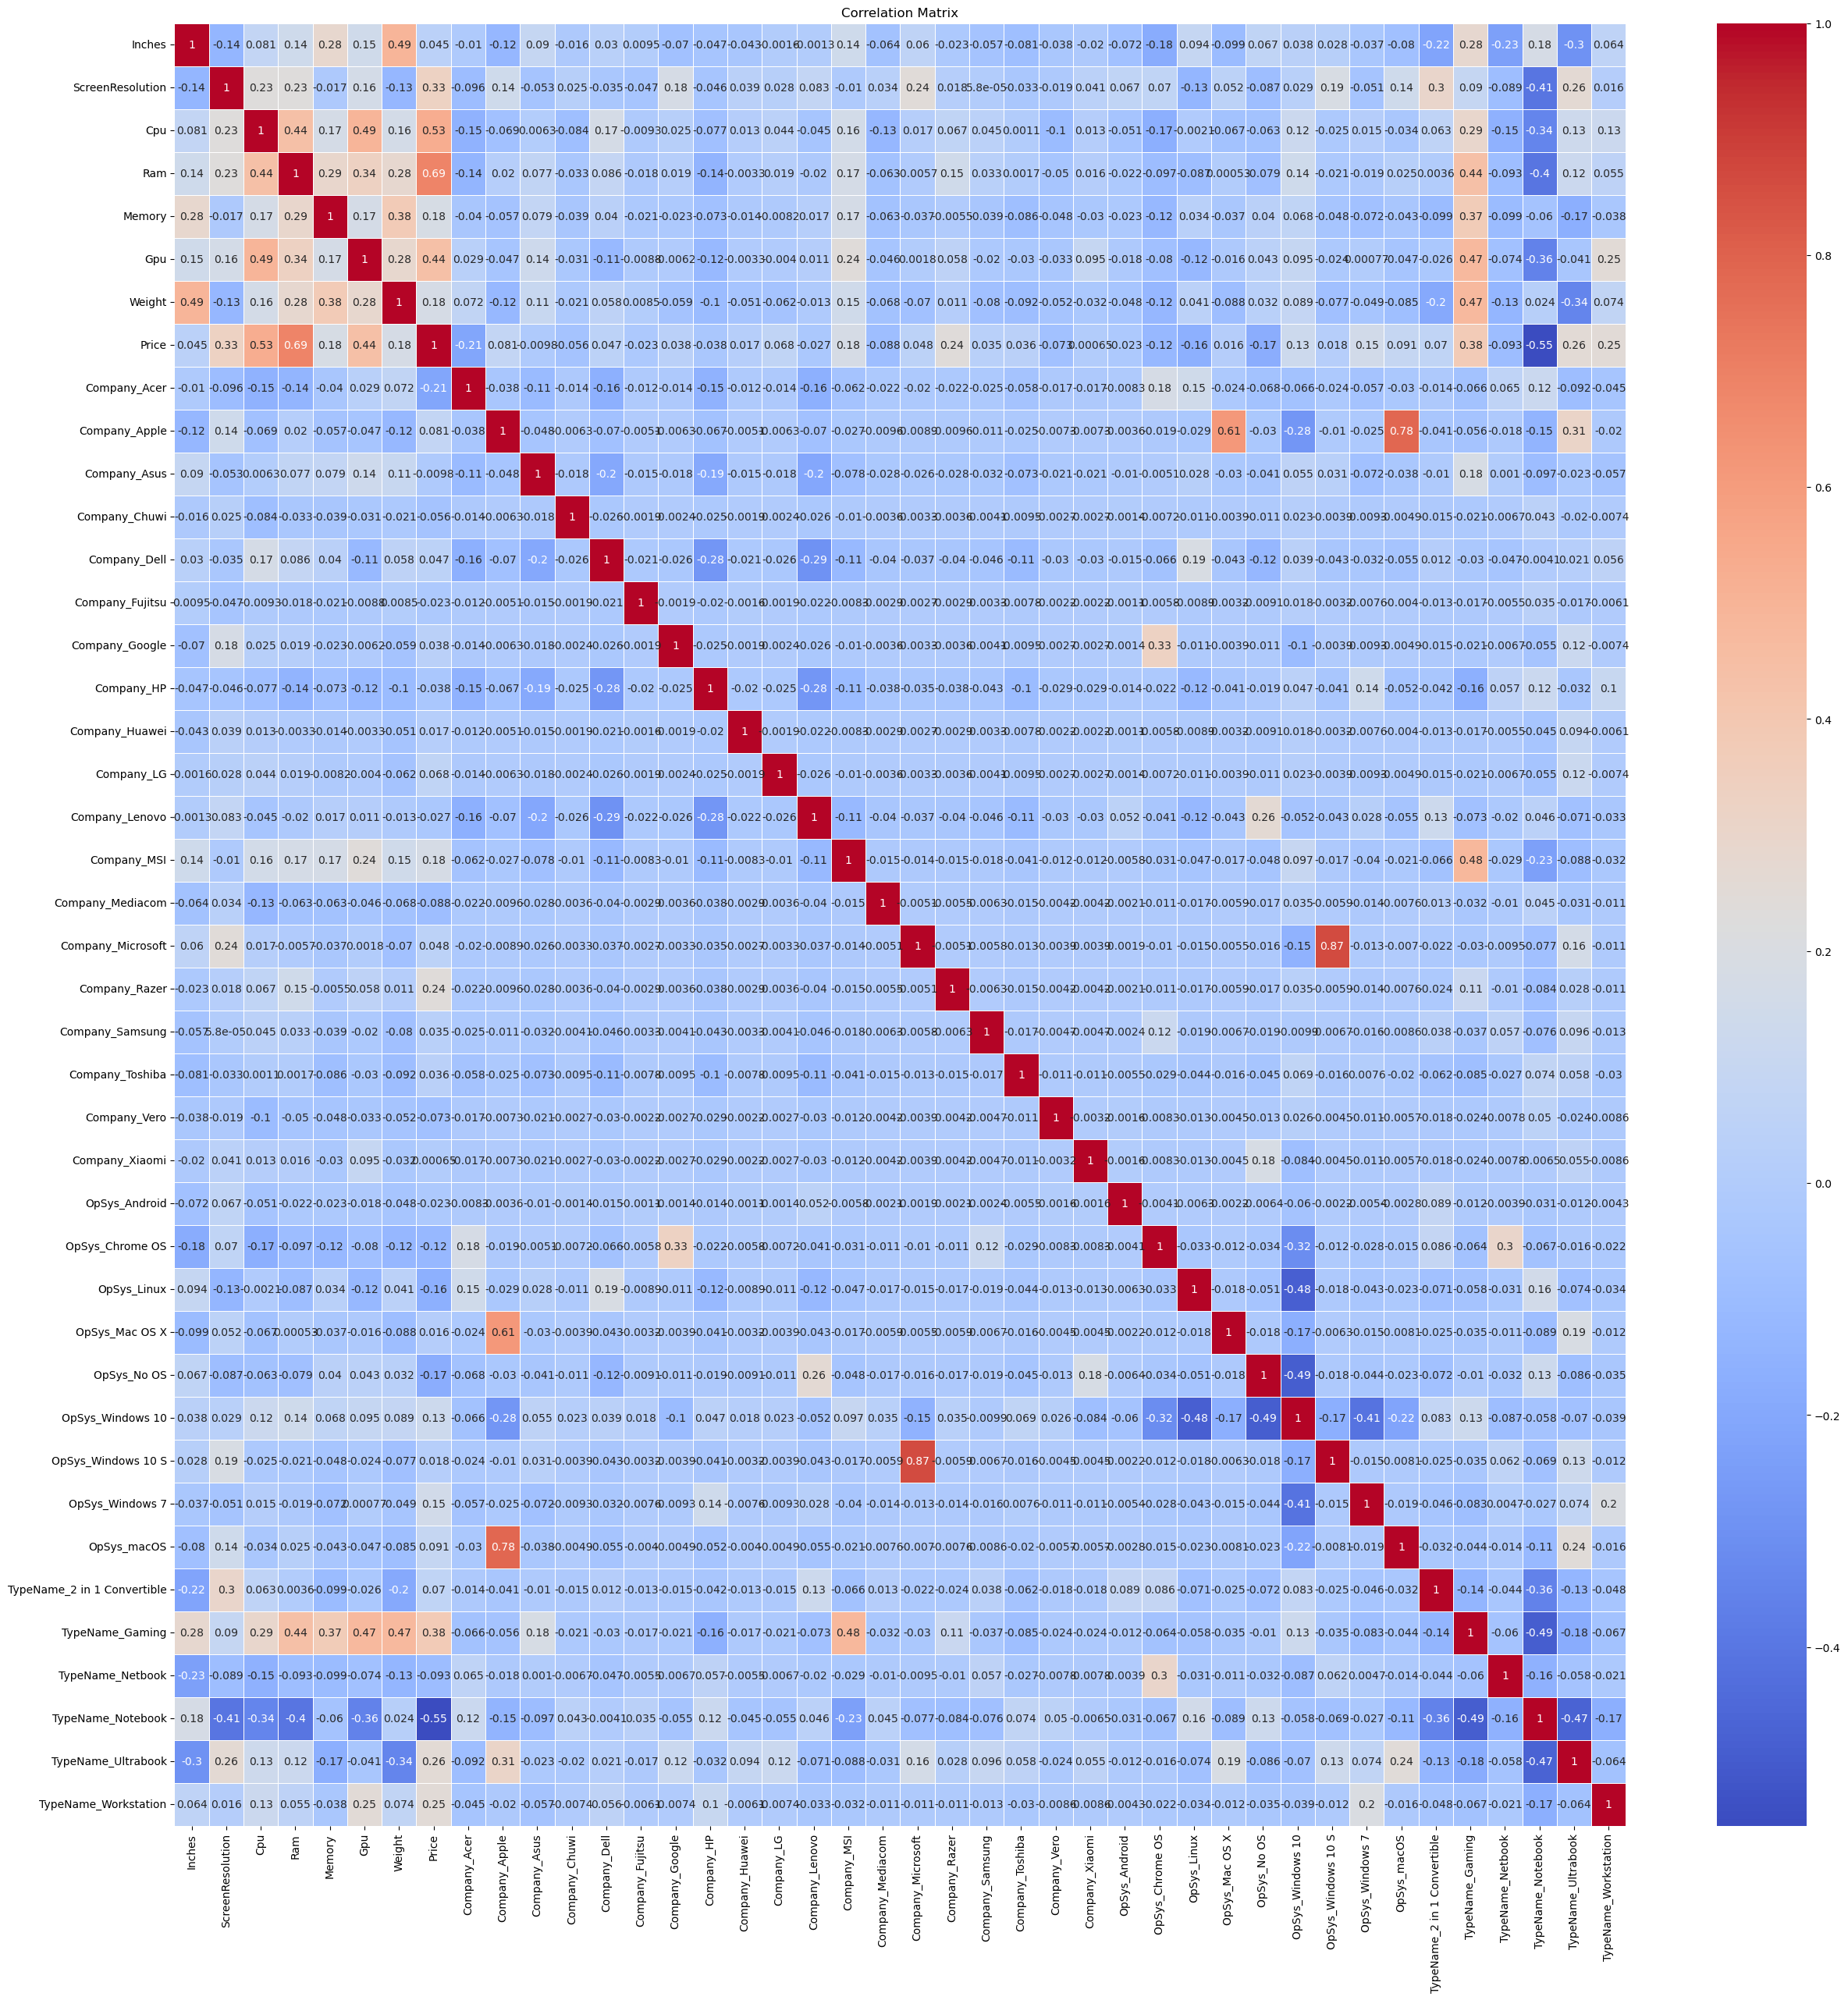

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a heatmap 
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [27]:
def makeBarValueCount(aDF, colName):
    aDF[colName].value_counts().plot(kind='bar', figsize=(7, 6))
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"The Count in the {colName} Column")

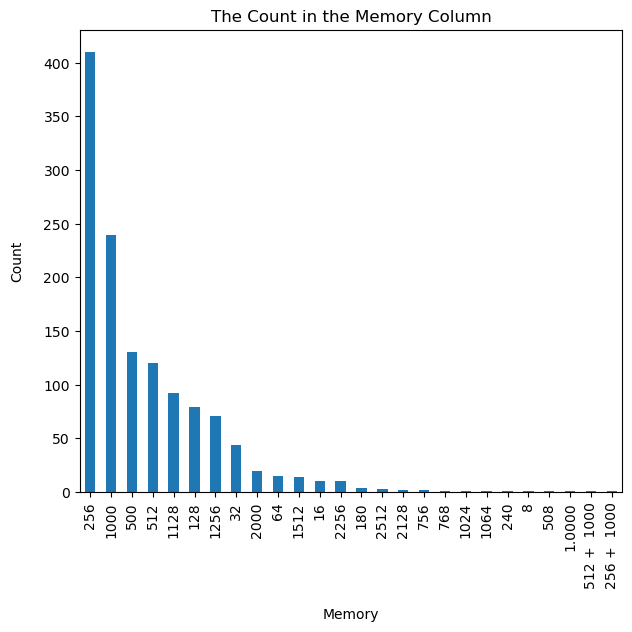

In [28]:
makeBarValueCount(CleandDF,"Memory")

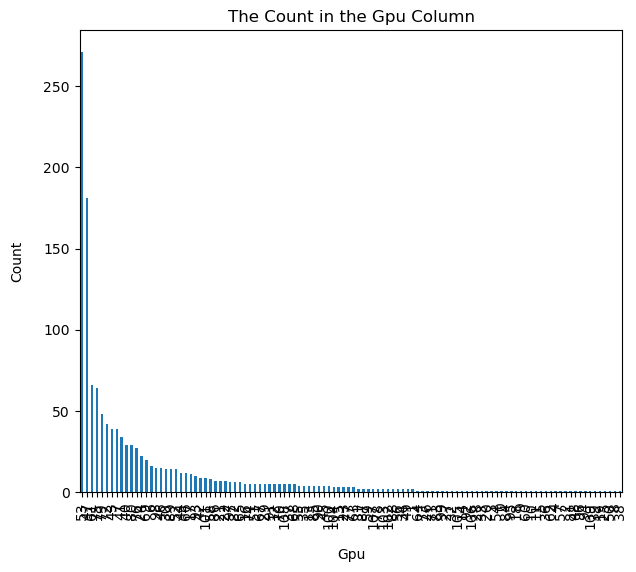

In [29]:
makeBarValueCount(CleandDF,"Gpu")

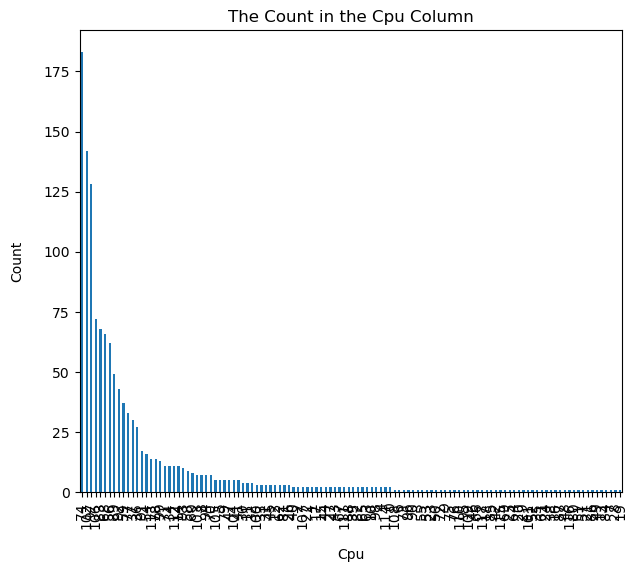

In [30]:
makeBarValueCount(CleandDF,"Cpu")

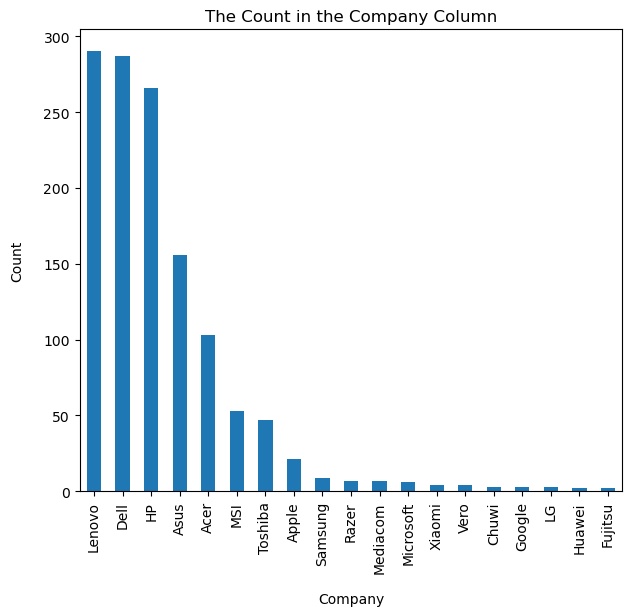

In [31]:
makeBarValueCount(CleandDF,"Company")

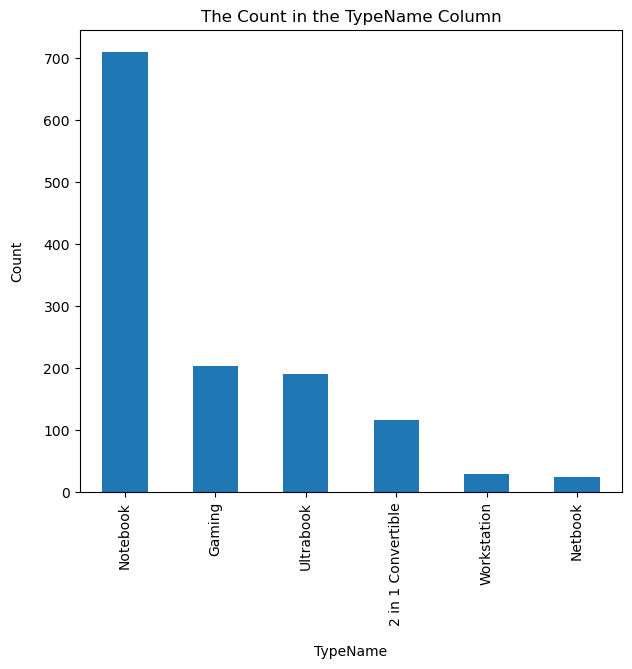

In [32]:
makeBarValueCount(CleandDF,"TypeName")

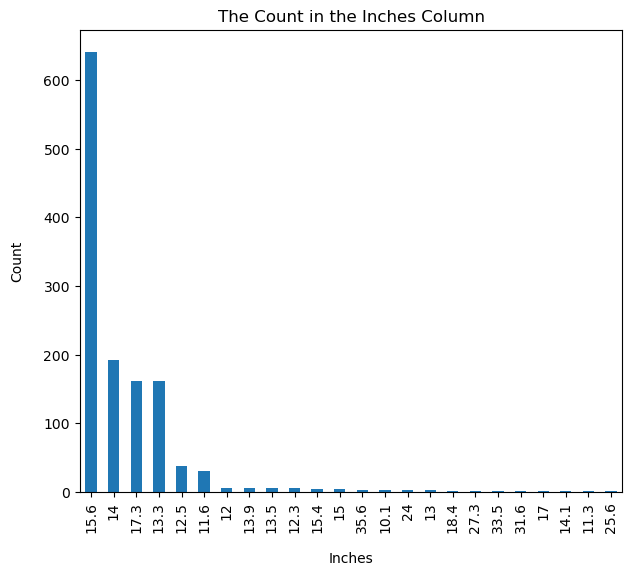

In [33]:
makeBarValueCount(CleandDF,"Inches")

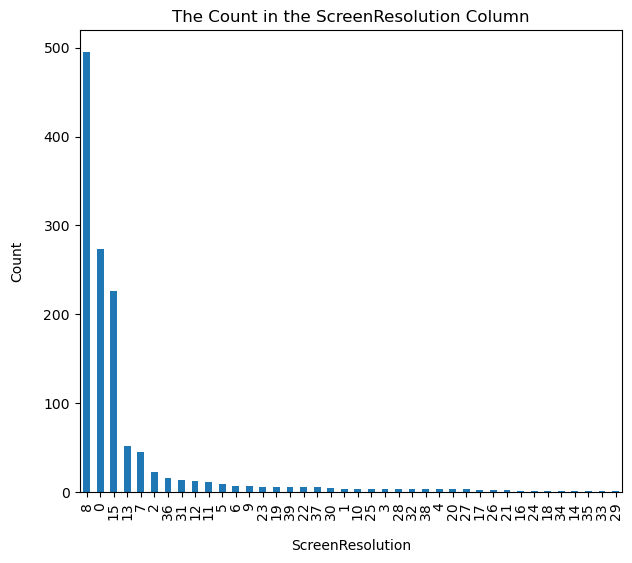

In [34]:
makeBarValueCount(CleandDF,"ScreenResolution")

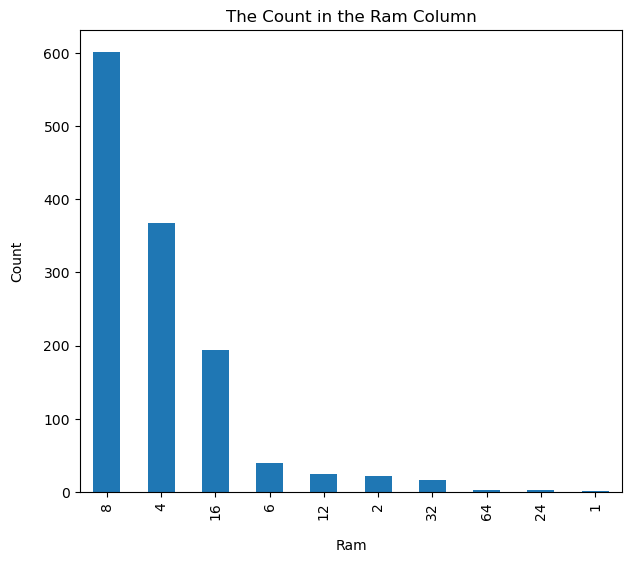

In [35]:
makeBarValueCount(CleandDF,"Ram")

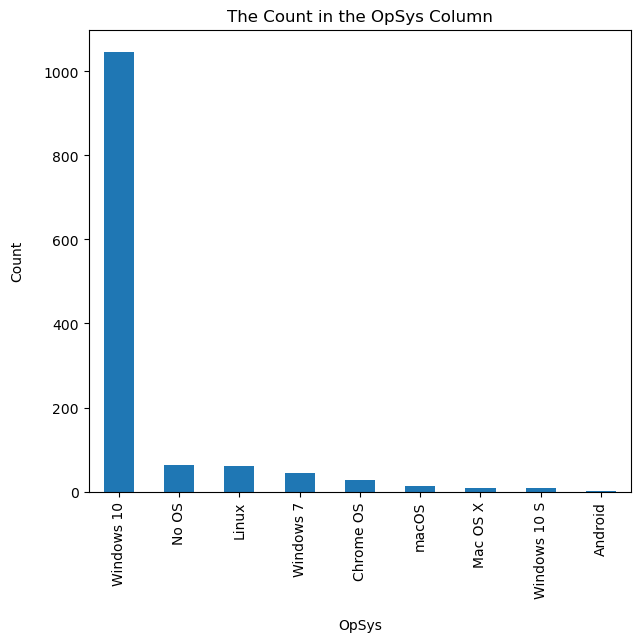

In [36]:
makeBarValueCount(CleandDF,"OpSys")

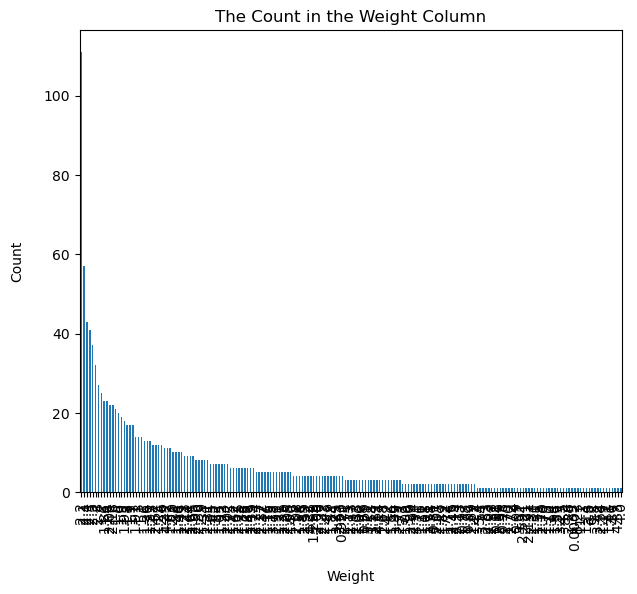

In [37]:
makeBarValueCount(CleandDF,"Weight")

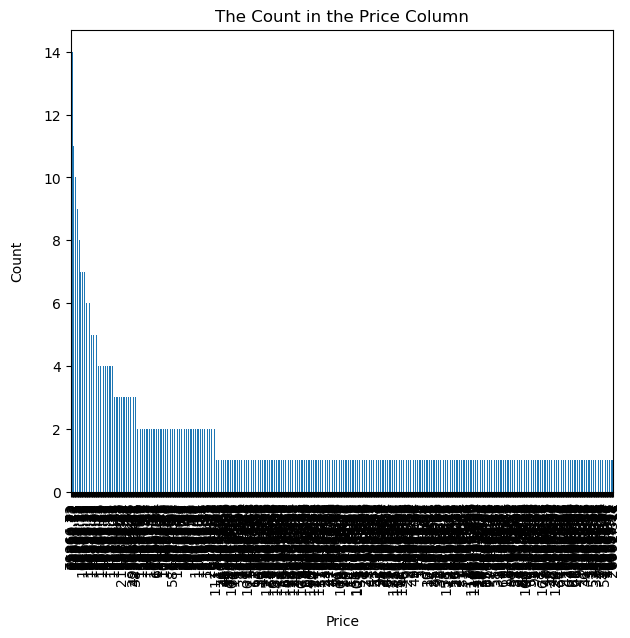

In [38]:
makeBarValueCount(CleandDF,"Price")

Text(0.5, 1.0, 'Box Plot of Price')

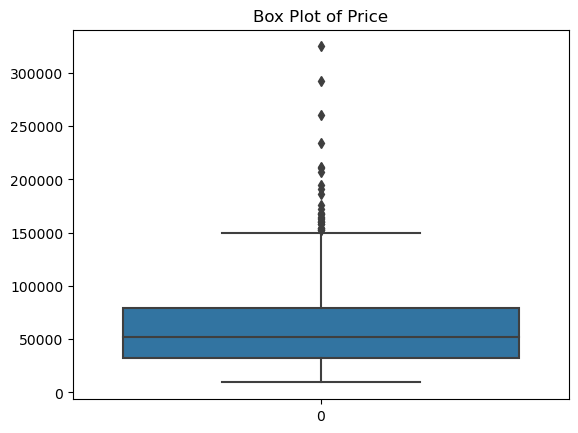

In [39]:
sns.boxplot(Final_ncode_DF['Price'])
plt.title("Box Plot of Price")

Text(0.5, 1.0, 'Box Plot of ScreenResolution')

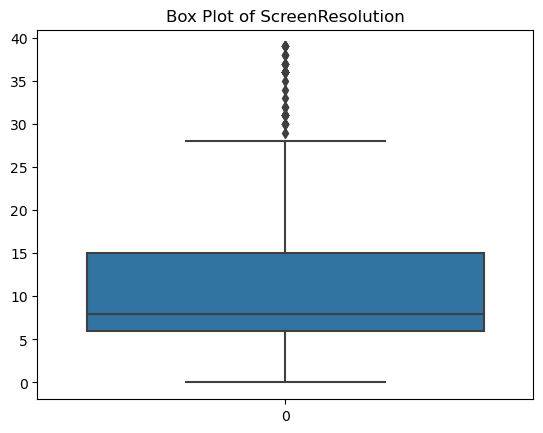

In [40]:
sns.boxplot(Final_ncode_DF['ScreenResolution'])
plt.title("Box Plot of ScreenResolution")

Text(0.5, 1.0, 'Box Plot of Cpu')

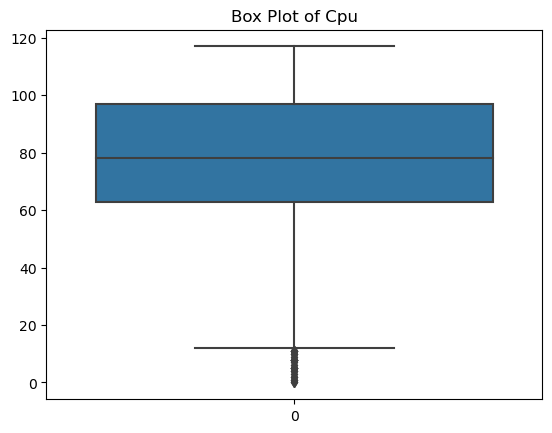

In [41]:
sns.boxplot(Final_ncode_DF['Cpu'])
plt.title("Box Plot of Cpu")

Text(0.5, 1.0, 'Box Plot of Ram')

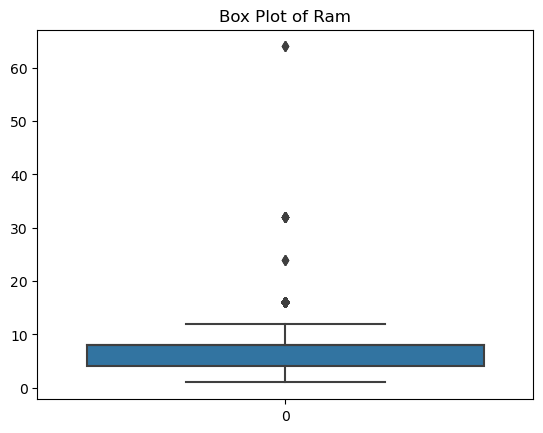

In [42]:
sns.boxplot(Final_ncode_DF['Ram'])
plt.title("Box Plot of Ram")

Text(0.5, 1.0, 'Box Plot of Gpu')

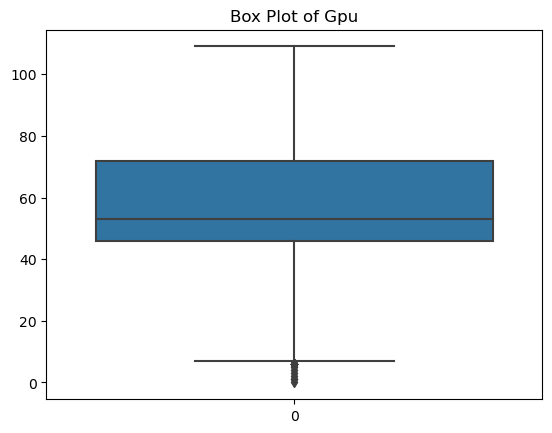

In [43]:
sns.boxplot(Final_ncode_DF['Gpu'])
plt.title("Box Plot of Gpu")

In [44]:
import numpy as np
Q1 = np.percentile(Final_ncode_DF['Price'], 25, interpolation='midpoint')
Q3 = np.percentile(Final_ncode_DF['Price'], 75, interpolation='midpoint')
IQR = Q3 - Q1

IQR
maxThreshold = Q3+1.5*IQR
minThreshold = Q1-1.5*IQR

iqrDF = Final_ncode_DF[Final_ncode_DF["Price"] < maxThreshold]
iqrDF = iqrDF[iqrDF["Price"] > minThreshold]

iqrDF.tail()

C:\Users\kcale\AppData\Local\Temp\ipykernel_28496\615042388.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(Final_ncode_DF['Price'], 25, interpolation='midpoint')
C:\Users\kcale\AppData\Local\Temp\ipykernel_28496\615042388.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(Final_ncode_DF['Price'], 75, interpolation='midpoint')


,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,Company_Acer,Company_Apple,...,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
1268,14.0,13,89,4,128,47,1.80,33992.64,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1269,13.3,19,89,16,512,47,1.30,79866.72,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1270,14.0,0,34,2,64,40,1.50,12201.12,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1271,15.6,0,89,6,1000,21,2.19,40705.92,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1272,15.6,0,34,4,500,40,2.20,19660.32,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
import numpy as np
Q1 = np.percentile(iqrDF['ScreenResolution'], 25, interpolation='midpoint')
Q3 = np.percentile(iqrDF['ScreenResolution'], 75, interpolation='midpoint')
IQR = Q3 - Q1

IQR
maxThreshold = Q3+1.5*IQR
minThreshold = Q1-1.5*IQR

iqrDF = iqrDF[iqrDF["ScreenResolution"] < maxThreshold]
iqrDF = iqrDF[iqrDF["ScreenResolution"] > minThreshold]

iqrDF.tail()

C:\Users\kcale\AppData\Local\Temp\ipykernel_28496\4200158697.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(iqrDF['ScreenResolution'], 25, interpolation='midpoint')
C:\Users\kcale\AppData\Local\Temp\ipykernel_28496\4200158697.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(iqrDF['ScreenResolution'], 75, interpolation='midpoint')


,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,Company_Acer,Company_Apple,...,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
1268,14.0,13,89,4,128,47,1.80,33992.64,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1269,13.3,19,89,16,512,47,1.30,79866.72,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1270,14.0,0,34,2,64,40,1.50,12201.12,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1271,15.6,0,89,6,1000,21,2.19,40705.92,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1272,15.6,0,34,4,500,40,2.20,19660.32,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
Q1 = np.percentile(iqrDF['Cpu'], 25, interpolation='midpoint')
Q3 = np.percentile(iqrDF['Cpu'], 75, interpolation='midpoint')
IQR = Q3 - Q1

IQR
maxThreshold = Q3+1.5*IQR
minThreshold = Q1-1.5*IQR

iqrDF = iqrDF[iqrDF["Cpu"] < maxThreshold]
iqrDF = iqrDF[iqrDF["Cpu"] > minThreshold]

iqrDF.tail()

C:\Users\kcale\AppData\Local\Temp\ipykernel_28496\1605266516.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(iqrDF['Cpu'], 25, interpolation='midpoint')
C:\Users\kcale\AppData\Local\Temp\ipykernel_28496\1605266516.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(iqrDF['Cpu'], 75, interpolation='midpoint')


,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,Company_Acer,Company_Apple,...,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
1268,14.0,13,89,4,128,47,1.80,33992.64,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1269,13.3,19,89,16,512,47,1.30,79866.72,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1270,14.0,0,34,2,64,40,1.50,12201.12,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1271,15.6,0,89,6,1000,21,2.19,40705.92,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1272,15.6,0,34,4,500,40,2.20,19660.32,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [47]:
Q1 = np.percentile(iqrDF['Ram'], 25, interpolation='midpoint')
Q3 = np.percentile(iqrDF['Ram'], 75, interpolation='midpoint')
IQR = Q3 - Q1

IQR
maxThreshold = Q3+1.5*IQR
minThreshold = Q1-1.5*IQR

iqrDF = iqrDF[iqrDF["Ram"] < maxThreshold]
iqrDF = iqrDF[iqrDF["Ram"] > minThreshold]

iqrDF.tail()

C:\Users\kcale\AppData\Local\Temp\ipykernel_28496\3734847597.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(iqrDF['Ram'], 25, interpolation='midpoint')
C:\Users\kcale\AppData\Local\Temp\ipykernel_28496\3734847597.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(iqrDF['Ram'], 75, interpolation='midpoint')


,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,Company_Acer,Company_Apple,...,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
1267,15.6,0,89,4,500,65,2.20,38378.6496,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1268,14.0,13,89,4,128,47,1.80,33992.6400,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1270,14.0,0,34,2,64,40,1.50,12201.1200,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1271,15.6,0,89,6,1000,21,2.19,40705.9200,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1272,15.6,0,34,4,500,40,2.20,19660.3200,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
categorical_col = ["ScreenResolution", "Memory","Ram", "Cpu","Gpu"]
numerical_col = ["Price", "Weight", "Inches"]
# normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# initialize the DF
normalizedDF = iqrDF

normalizedDF[["ScreenResolution", "Memory","Ram", "Cpu","Gpu","Price", "Weight", "Inches"]] = scaler.fit_transform(iqrDF[[ "ScreenResolution", "Memory","Ram", "Cpu","Gpu","Price", "Weight", "Inches"]])

normalizedDF.head()

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,Company_Acer,Company_Apple,...,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,0.125490,0.793103,0.535714,0.636364,0.050577,0.537037,0.163075,0.459295,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.125490,0.034483,0.517857,0.636364,0.050577,0.472222,0.159504,0.285634,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.215686,0.275862,0.616071,0.636364,0.101553,0.490741,0.221410,0.157998,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.125490,0.793103,0.553571,0.636364,0.101553,0.546296,0.163075,0.642080,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.215686,0.000000,0.080357,0.272727,0.198726,0.157407,0.249982,0.089046,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
for col in normalizedDF:
    naCount = normalizedDF[col].isna().sum()
    print(f"The number of na values in the {col} col is {naCount}")

The number of na values in the Inches col is 0
The number of na values in the ScreenResolution col is 0
The number of na values in the Cpu col is 0
The number of na values in the Ram col is 0
The number of na values in the Memory col is 0
The number of na values in the Gpu col is 0
The number of na values in the Weight col is 1
The number of na values in the Price col is 0
The number of na values in the Company_Acer col is 0
The number of na values in the Company_Apple col is 0
The number of na values in the Company_Asus col is 0
The number of na values in the Company_Chuwi col is 0
The number of na values in the Company_Dell col is 0
The number of na values in the Company_Fujitsu col is 0
The number of na values in the Company_Google col is 0
The number of na values in the Company_HP col is 0
The number of na values in the Company_Huawei col is 0
The number of na values in the Company_LG col is 0
The number of na values in the Company_Lenovo col is 0
The number of na values in the Com

In [50]:
CleanDF2 = normalizedDF.dropna()
CleanDF2.tail()

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,Company_Acer,Company_Apple,...,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
1267,0.215686,0.000000,0.750000,0.272727,0.198726,0.601852,0.261887,0.215256,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1268,0.152941,0.448276,0.750000,0.272727,0.050577,0.435185,0.214267,0.182821,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1270,0.152941,0.000000,0.258929,0.090909,0.025090,0.370370,0.178552,0.021671,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1271,0.215686,0.000000,0.750000,0.454545,0.397849,0.194444,0.260697,0.232467,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1272,0.215686,0.000000,0.258929,0.272727,0.198726,0.370370,0.261887,0.076832,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [51]:

columns_to_extract = ["Price"]

# Extract selected columns into a new DataFrame (xDF)
xDF = CleanDF2.drop(["Price"], axis= 1)
yDF = CleanDF2[columns_to_extract].copy()
xDF.head()

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Company_Acer,Company_Apple,Company_Asus,...,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,0.125490,0.793103,0.535714,0.636364,0.050577,0.537037,0.163075,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.125490,0.034483,0.517857,0.636364,0.050577,0.472222,0.159504,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.215686,0.275862,0.616071,0.636364,0.101553,0.490741,0.221410,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.125490,0.793103,0.553571,0.636364,0.101553,0.546296,0.163075,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.215686,0.000000,0.080357,0.272727,0.198726,0.157407,0.249982,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [52]:
yDF.head()

,Price
0,0.459295
1,0.285634
2,0.157998
4,0.642080
5,0.089046


In [53]:
from sklearn.model_selection import train_test_split
xDF.columns = xDF.columns.astype(str) 
yDF.columns = yDF.columns.astype(str)
xDFTrain, xDFTest, yDFTrain, yDFTest = train_test_split(xDF, 
                                                yDF, 
                                                test_size=0.30)

In [54]:
xDFTest.head()


,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Company_Acer,Company_Apple,Company_Asus,...,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
918,0.215686,0.000000,0.562500,0.636364,0.101553,0.435185,0.261887,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
677,0.125490,0.517241,0.616071,0.636364,0.101553,0.490741,0.178552,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1142,0.215686,0.275862,0.750000,0.636364,0.101553,0.435185,0.233315,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
912,0.215686,0.000000,0.437500,0.272727,0.397849,0.435185,0.259506,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
812,0.152941,0.517241,0.651786,0.636364,0.101553,0.490741,0.157123,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
yDFTrain

(697, 1)

In [62]:
yDFTest.to_csv('c:/Users/Kcale/OneDrive/Documents/Data 350/MP3/yTryTest.csv', index=False)

In [64]:
yDFTrain['Price'] = yDFTrain['Price'].apply(lambda x: str(x) + ', ' if pd.notna(x) else '')


In [65]:
yDFTest['Price'] = yDFTest['Price'].apply(lambda x: str(x) + ', ' if pd.notna(x) else '')

In [101]:
yDFTest.replace('"', " " )
yDFTrain.replace('"', " " )

,Price
843,"0.2899921197793539,"
15,"0.5297675334909379,"
865,"0.4711977935382191,"
1154,"0.2840858944050434,"
989,"0.2348266351457841,"
...,...
549,"0.17966903073286056,"
656,"0.06895193065405834,"
50,"0.36603624901497245,"
1220,"0.05910165484633571,"


In [102]:
yDFTest.to_csv('c:/Users/Kcale/OneDrive/Documents/Data 350/MP3/yTryTest.csv', index=False)

In [109]:
from sklearn.metrics import accuracy_score
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(xDFTrain, yDFTrain)
preds = clf.predict(xDFTest)
accuracy = accuracy_score(yDFTest,preds)
print("Accuracy:", accuracy)

Accuracy: 0.03666666666666667


In [111]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Assuming xDFTrain, yDFTrain, xDFTest, yDFTest are DataFrames or arrays
clf = RandomForestClassifier()
clf.fit(xDFTrain, yDFTrain.values.ravel())

preds = clf.predict(xDFTest)
accuracy = accuracy_score(yDFTest, preds)

print("Accuracy:", accuracy)


Accuracy: 0.04


In [112]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming xDFTrain, yDFTrain, xDFTest, yDFTest are DataFrames or arrays
X_train, X_test, y_train, y_test = train_test_split(xDFTrain, yDFTrain, test_size=0.2, random_state=42)

# Create and train a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
preds = clf.predict(X_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, preds, average='weighted')
recall = recall_score(y_test, preds, average='weighted')
f1 = f1_score(y_test, preds, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


c:\Users\kcale\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Precision: 0.05892857142857143
Recall: 0.05714285714285714
F1 Score: 0.0564625850340136


c:\Users\kcale\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kcale\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming xDFTrain, yDFTrain, xDFTest, yDFTest are DataFrames or arrays
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xDFTrain)
X_test_scaled = scaler.transform(xDFTest)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=1000)
clf.fit(X_train_scaled, yDFTrain.values.ravel())
preds = clf.predict(X_test_scaled)
accuracy = accuracy_score(yDFTest, preds)

print("Accuracy:", accuracy)



Accuracy: 0.0033333333333333335


c:\Users\kcale\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
